# 📘 Chapter 3 – Analysis of Variance (ANOVA)

## 🌍 What is ANOVA?
- **ANOVA (Analysis of Variance)** – statistical method by **R.A. Fisher (1920s)**.  
- Purpose: test if **group means differ** significantly.  
- Used when:  
  - Comparing **≥2 groups** (beyond $t$-test).  
  - Studying **several factors simultaneously**.  
- Applications: agriculture, industry, medicine, biology, social sciences.  

---

## 🧪 Example (p. 66 – Etch Rate Experiment)
- Engineer studies **effect of RF power** on **etch rate**.  
- **Factor:** RF power (4 levels: 160, 180, 200, 220 W).  
- **Response:** Etch rate.  
- **Design:** $n=5$ replicates per level, total $N = 20$, runs randomized.  
- **Questions:**  
  1. Does RF power affect mean etch rate?  
  2. Is there an optimal RF power setting?  

---

## 📊 One-Way ANOVA Model
**Effects model:**  

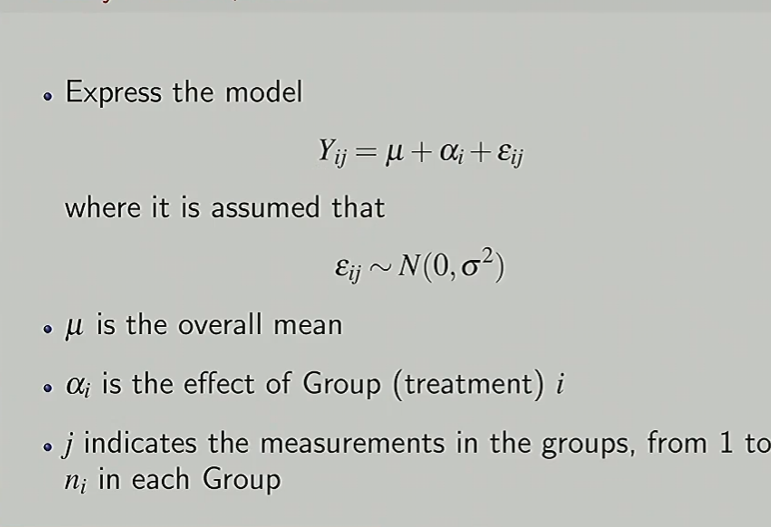

- i is the group
- j is the individual observation

$y_{ij} = \mu + \tau_i + \varepsilon_{ij}, \quad \varepsilon_{ij} \sim N(0, \sigma^2)$  

- $i = 1, \dots, a$ (treatments), $j = 1, \dots, n$ (replicates).  
- $\mu$ = grand mean.  
- $\tau_i$ = treatment effect.  
- $\varepsilon_{ij}$ = random error.  

**Means model:**  
$ y_{ij} = \mu_i + \varepsilon_{ij}, \quad \mu_i = \mu + \tau_i $  

---

## 📐 Partitioning Variability
Total variation is split into **between groups** and **within groups**:  

$ SS_T = \sum_{i=1}^a \sum_{j=1}^n (y_{ij} - \bar{y}_{..})^2 $, 

$ SS_T = SS_{\text{Treatments}} + SS_E $

- $SS_{\text{Treatments}}$ = variation **due to factor (between means)**.  
- $SS_E$ = **error (within groups)** variation.  

##### Treatmeant is like between the group and residual is within: https://www.youtube.com/watch?v=wraov1Nv7UA (6:22)
---

## 📏 Mean Squares & F-Test
- Mean squares:  
$$ MS_{\text{Treatments}} = \frac{SS_{\text{Treatments}}}{a-1}, 
\quad 
MS_E = \frac{SS_E}{a(n-1)} $$  

- Hypotheses:  
$ H_0: \mu_1 = \mu_2 = \cdots = \mu_a $
$ H_a: \text{At least one mean differs} $

- F-statistic:  
$ F_0 = \frac{MS_{\text{Treatments}}}{MS_E} $  

- Decision rule: reject $H_0$ if  
$ F_0 > F_{\alpha,\,a-1,\,a(n-1)} $  

---

## 🔍 Model Assumptions (Sec. 3.4, p. 80)
1. **Normality:** $\varepsilon_{ij} \sim N(0,\sigma^2)$.  
   - Check: Normal probability plot of residuals (should be ~straight line).  
2. **Constant variance (homoscedasticity).**  
   - Check: Residuals vs fitted values → should look like random band.  
   - Funnel shape → variance not constant → use transformation.  
3. **Independence of errors.**  
   - Check: residuals vs time order plot (no patterns).  
4. **Correct model form.**  
   - Curved patterns → may need quadratic or interaction terms.  

---

## 🔄 Data Transformations (Box–Cox, 1964)
Use if variance depends on mean ($\sigma_y \propto \mu^\alpha$).  

| Relationship | $\lambda$ | Transformation |
|--------------|-----------|----------------|
| $\sigma_y \propto \mu^0$ | $1$ | $y$ (no transform) |
| $\sigma_y \propto \mu^{1/2}$ | $1/2$ | $\sqrt{y}$ |
| $\sigma_y \propto \mu^1$ | $0$ | $\ln(y)$ |
| $\sigma_y \propto \mu^{3/2}$ | $-1/2$ | $1/\sqrt{y}$ |
| $\sigma_y \propto \mu^2$ | $-1$ | $1/y$ |

---

## 📊 Post-ANOVA: Multiple Comparisons (Sec. 3.5)
- ANOVA → tells if *any* means differ, not **which** ones.  
- Need **multiple comparisons** to locate differences.  

### Fisher’s LSD (Least Significant Difference)
Pairwise $t$-tests using $MS_E$:  

$ SE(\bar{y}_i - \bar{y}_j) = \sqrt{ MSE \left( \frac{1}{n_i} + \frac{1}{n_j} \right) } $  

Reject $H_0: \mu_i = \mu_j$ if $|\bar{y}_i - \bar{y}_j| > t_{\alpha/2,\,df_E} \cdot SE(\bar{y}_i - \bar{y}_j)$  

---

## 📏 Sample Size Determination (Sec. 3.7, p. 105)
- Needed to ensure enough **power** to detect effect size $D$.  
- Depends on: $\alpha$, $\beta$, $D$, $\sigma^2$, $a$.  

### Errors
- **Type I error ($\alpha$):** reject $H_0$ when true.  
- **Type II error ($\beta$):** fail to reject $H_0$ when false.  
- **Power:** $1-\beta$.  

### Power function (fixed effects ANOVA)
$ \Phi^2 = \frac{n \sum_{i=1}^a \tau_i^2}{a \sigma^2} $ 

Use **OC curves** or software to choose $n$ for desired power.  

---

## 🧮 Example 3-1 (Etch Rate, p. 66–69)

### Data
- Factor: RF power (4 levels: 160, 180, 200, 220 W).  
- Replicates: $n=5$, total $N=20$.  
- Response: etch rate (Å/min).  

### Hypotheses
$ H_0: \mu_{160} = \mu_{180} = \mu_{200} = \mu_{220} $
$ H_a: \text{At least one mean differs} $ 

### ANOVA Computations
1. **Compute means:** $\bar{y}_{i.}$ for each power level, and $\bar{y}_{..}$ (grand mean).  
2. **Partition variance:**  
   - $SS_T = \sum (y_{ij} - \bar{y}_{..})^2$  
   - $SS_{\text{Treatments}} = \sum_{i=1}^a n (\bar{y}_{i.} - \bar{y}_{..})^2$  
   - $SS_E = SS_T - SS_{\text{Treatments}}$  
3. **Degrees of freedom:**  
   - $df_T = N - 1 = 19$  
   - $df_{\text{Treatments}} = a - 1 = 3$  
   - $df_E = a(n-1) = 16$  
4. **Mean squares:**  
   - $MS_{\text{Treatments}} = SS_{\text{Treatments}} / 3$  
   - $MS_E = SS_E / 16$  
5. **F statistic:**  
   $ F_0 = \frac{MS_{\text{Treatments}}}{MS_E} $ 

### Results
- $F_0$ is large.  
- p-value $< 0.01$.  

✅ **Conclusion:** Reject $H_0$ → RF power significantly affects mean etch rate.  

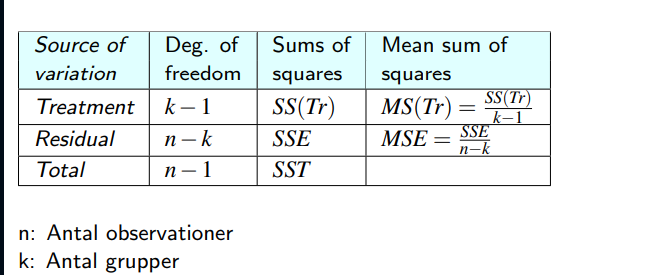
---

## 📝 Key Takeaways
- ANOVA compares **multiple means** by analyzing variance.  
- **Partitioning:** $SS_T = SS_{\text{Treatments}} + SS_E$.  
- **F-test:** $F_0 = MS_{\text{Treatments}} / MS_E$.  
- **Assumptions:** normality, independence, homoscedasticity, correct model.  
- **If $H_0$ rejected:** use **multiple comparisons** (Fisher’s LSD, Tukey, etc.).  
- **Sample size planning:** choose $n$ to achieve target power for detecting effect $D$.  

---
